# Bank Customer Churn Analysis

In [86]:
#Importing the necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#To enable plotting in Jupyter Notebook
%matplotlib inline

In [56]:
#Reading the CSV file into a pandas dataframe
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Summarization and Data Preparation

By doing EDA, it was observed that the column 'Surname' had abnormal entries in few records such as 'H?'. Also the 'Surname' column is a poor predictor when it comes to predicting the churnability of a customer. Therefore 'Surname' is dropped. The column 'RowNumber' and 'CustomerId' are also dropped.

In [57]:
#Dropping the columns 'RowNumber', 'CustomerId' and 'Surname'
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#To check the result of the drop operation
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


None of the columns here talk about the services provided by the bank and if the customers are satisfied with the service or not. For a customer to churn or not churn, it depends upon the various services provided by the banks. However we proceed with the above set of features.

In [58]:
#Printing the shape of the dataframe
df.shape

(10000, 11)

10000 records are sufficient enough to represent the different permutations and combinations of 11 features.

In [59]:
#Using info() to generate information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Of the 10000 entries in total, all the columns have all the 10000 entries. Therefore there are NO MISSING VALUES.

In [60]:
#To check the balance between two classes
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

This is a case of imbalanced representation of classes. Any model is biased towards predicting correctly the class which is of higher representation.

In [61]:
#Printing the data type of all the columns
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The columns 'Geography', 'Gender' are of 'object' data type. These have to be handled before building the model.

In [62]:
#Using get_dummies to handle the columns 'Geography' and 'Gender'
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

In [63]:
#To verify the above operation
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [64]:
#Converting the data type of the columns 'Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember' to categorical data type
df['Age'] = df.Age.astype('category')
df['NumOfProducts'] = df.NumOfProducts.astype('category')
df['HasCrCard'] = df.HasCrCard.astype('category')
df['IsActiveMember'] = df.IsActiveMember.astype('category')
df['Geography_France'] = df.Geography_France.astype('category')
df['Geography_Germany'] = df.Geography_Germany.astype('category')
df['Geography_Spain'] = df.Geography_Spain.astype('category')
df['Gender_Female'] = df.Gender_Female.astype('category')
df['Gender_Male'] = df.Gender_Male.astype('category')

# Visualization using Pair Plot and Heat Map

C:\Users\hari_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hari_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


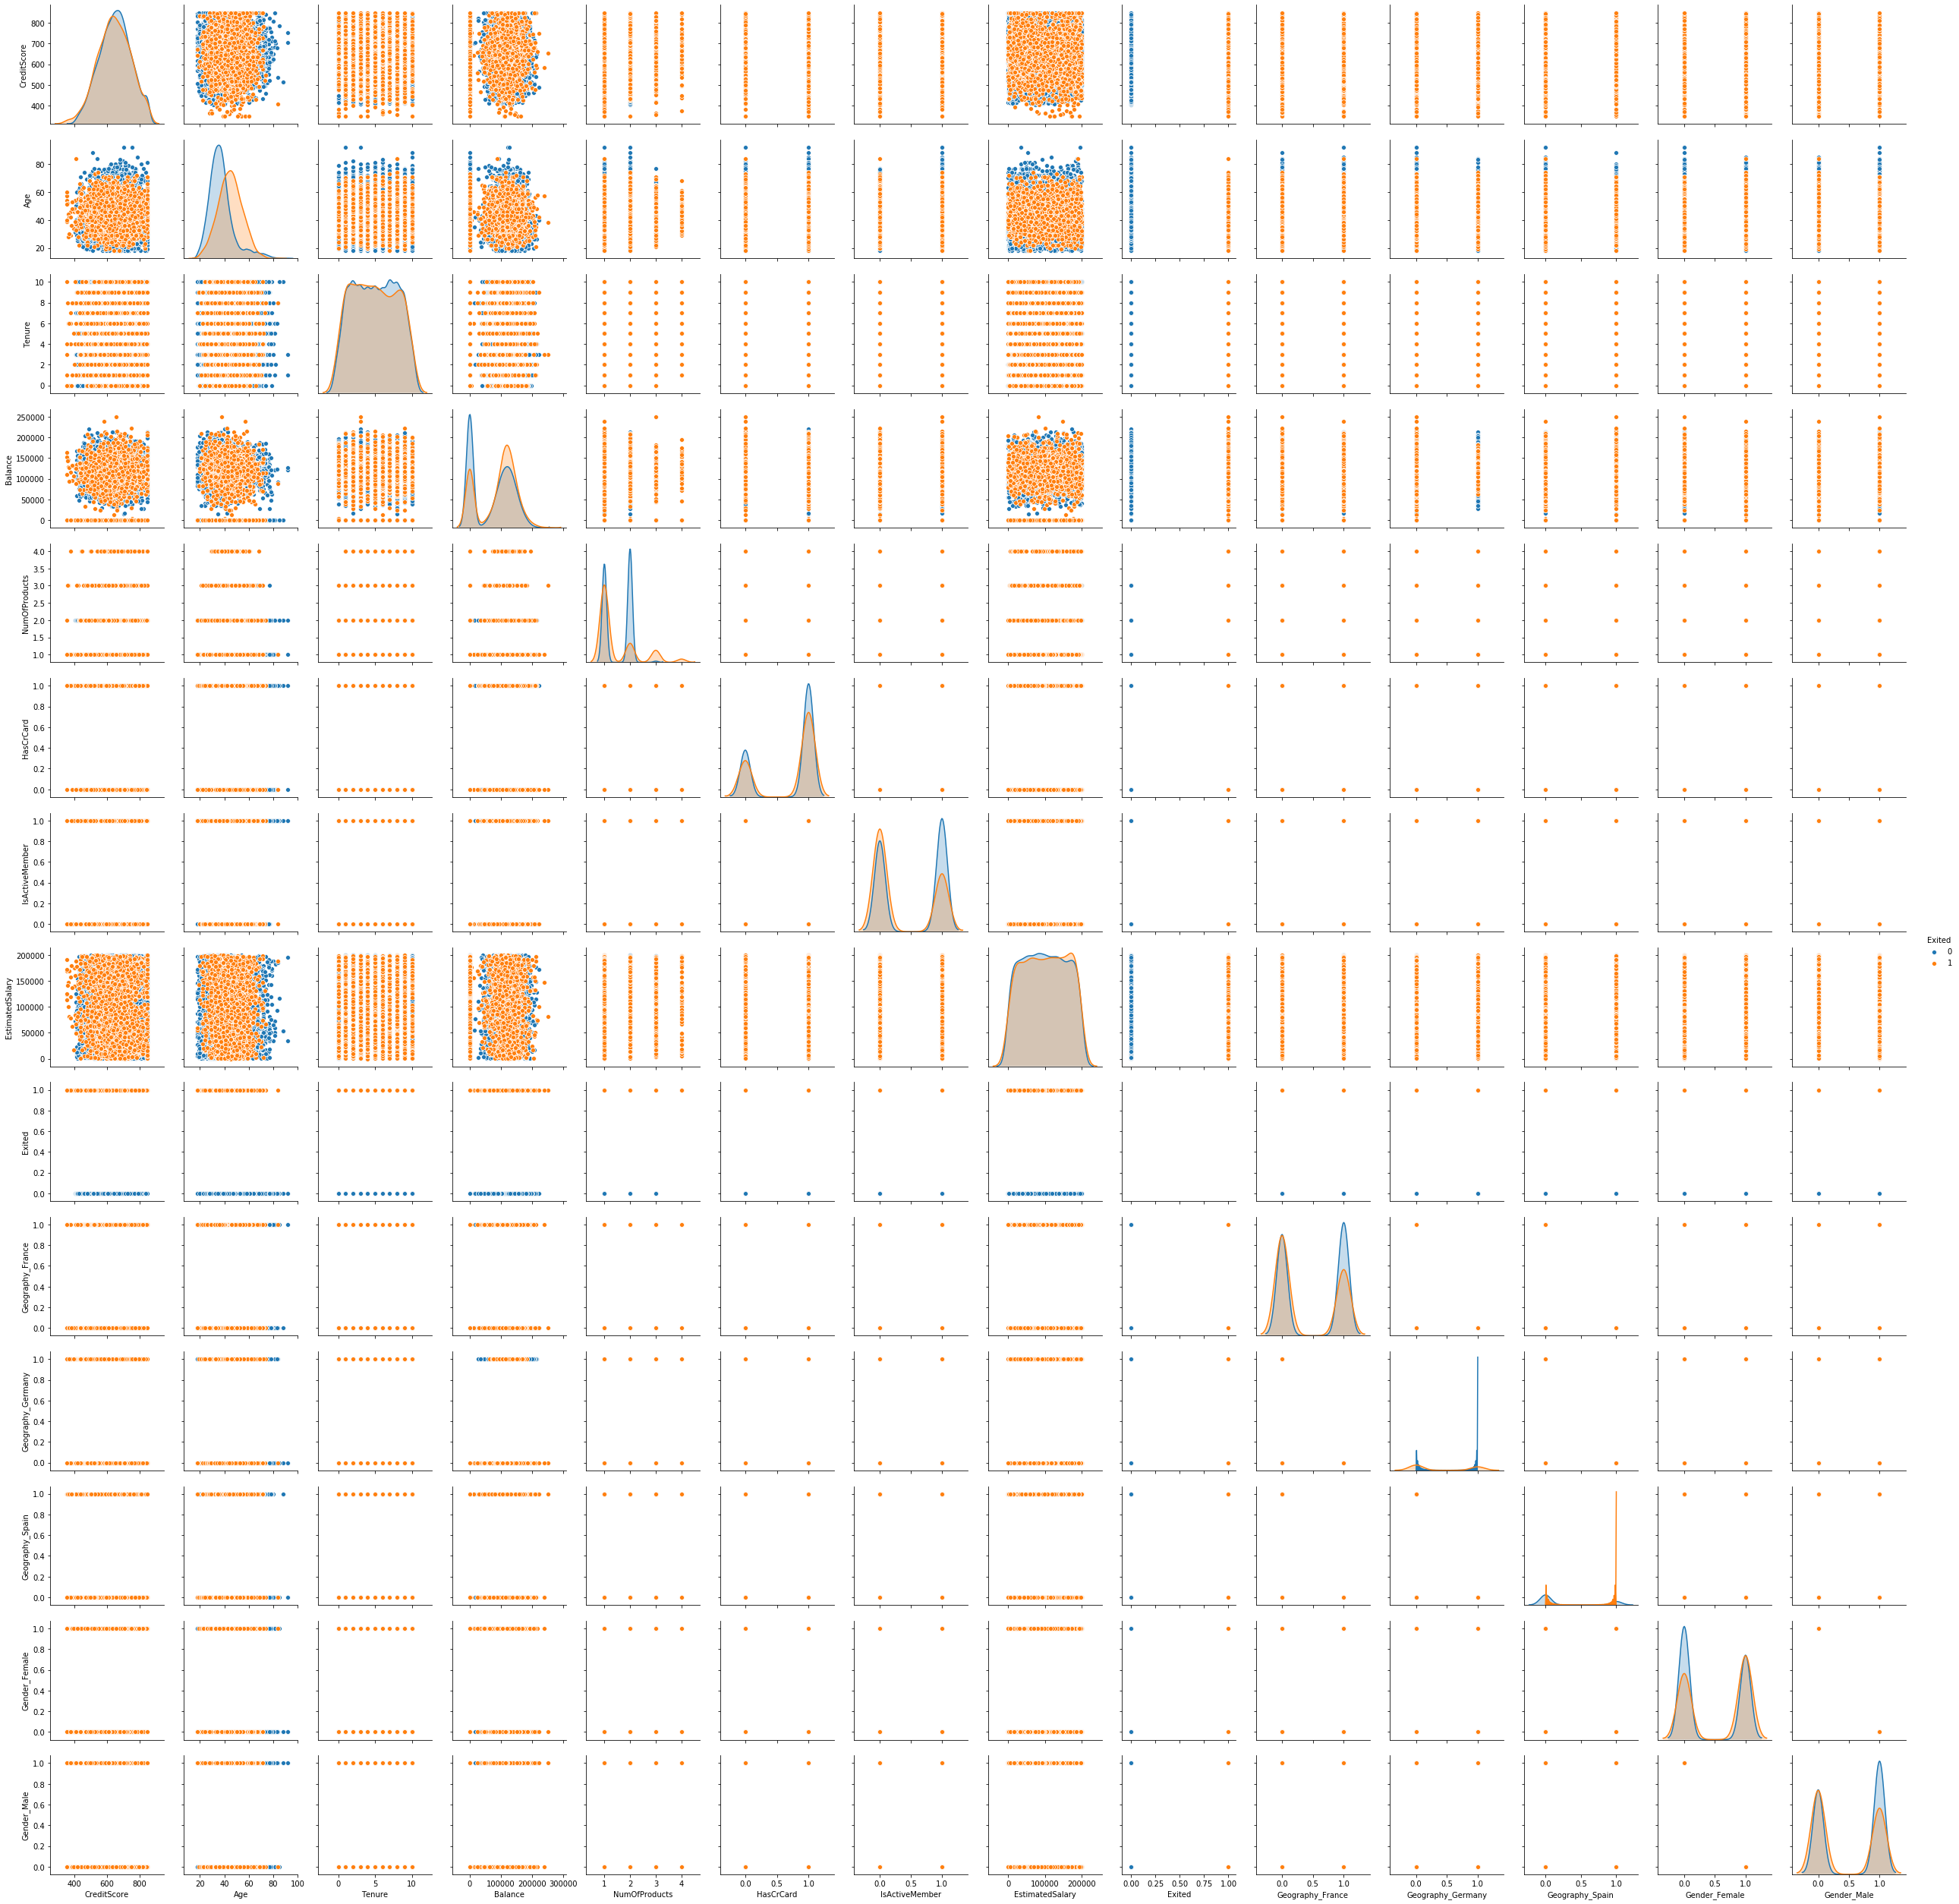

In [11]:
#Pairplot of the dataframe
sns.pairplot(data=df, hue='Exited', diag_kind='kde')

Interpretation from the diagonals of the Pair Plot:

1. The columns 'CreditScore', 'Tenure', 'EstimatedSalary' have their distribution in such a way that the classes completely overlap each other. Therefore these columns do not have a well defined boundary that separates the two classes. POOR FEATURES.

2. The column 'Age' has a better separation than the other columns.

3. The column 'Balance' has two clusters of customers for both the classes(Churned and Not Churned). For higher balance, there is a small separation between the classes.

4. The column 'NumOfProducts' have overlapping classes when the value is 1. For values 2,3 and 4 there is a separation between the classes.

5. The column 'HasCrCard' and 'IsActiveMember' has a minimal separation between the two classes.

6. For the column 'Geography_France', there seem to be a separation between classes among the customers who are based in France.

7. Very few people are based in Germany and Spain as suggested by the low density plot for the columns 'Geography_Germany', 'Geography_Spain'.

8. Combining the plots 'Gender_Female' and 'Gender_Male', we observe that there is a separation between the classes among the male customers. 

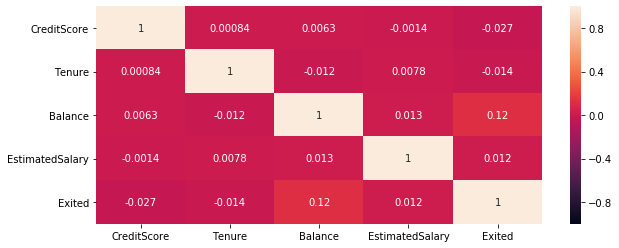

In [65]:
#Heatmap using the correlation matrix
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Interpretation from the Heat Map:

All the continuous columns 'CreditScore', 'Balance', 'EstimatedSalary' have a poor correlation with 'Exited'. None of them are even weak predictors.

In [66]:
#Descriptive Statistics of the dataframe
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,70.0,37.0,478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,10000.0,NaN,NaN,NaN,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,4.0,1.0,5084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasCrCard,10000.0,2.0,1.0,7055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,10000.0,2.0,1.0,5151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,NaN,NaN,NaN,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
Geography_France,10000.0,2.0,1.0,5014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#Analyzing Outliers in the column 'CreditScore' 
q3 = 718.0000
q1 = 584.00
iqr = q3 - q1
x = iqr * 1.5   #1.5 is the Statistical Estimator

#Computing the Highest and the Lowest possible value of 'CreditScore'
High = 718.0000 + x
Low = 584.00 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 919.0
The Lowest possible value: 383.0


In [68]:
df[df['CreditScore'] > 919.0]  #No Outliers in the higher range

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [69]:
df[df['CreditScore'] < 383.0].shape  #15 records identified as Outliers in the lower range.

(15, 14)

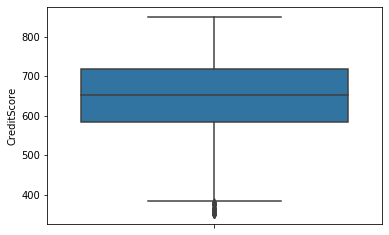

In [70]:
#Boxplot of 'CreditScore'
sns.boxplot(y=df['CreditScore'])  #Boxplot confirms the presence of Outliers in the column 'CreditScore'

In [71]:
#Analyzing Outliers in the column 'Balance' 
q3 = 127644.2400
q1 = 0.0
iqr = q3 - q1
x = iqr * 1.5   #1.5 is the Statistical Estimator

#Computing the Highest and the Lowest possible value of 'Balance'
High = 127644.2400  + x
Low = 0.0 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 319110.60000000003
The Lowest possible value: -191466.36000000002


In [72]:
df[df['Balance'] > 319110.60000000003]  #No Outliers in the higher range

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [73]:
df[df['Balance'] < -191466.36000000002] #No Outliers in the lower range

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [74]:
#Analyzing Outliers in the column 'EstimatedSalary' 
q3 = 149388.2475
q1 = 51002.11
iqr = q3 - q1
x = iqr * 1.5   #1.5 is the Statistical Estimator

#Computing the Highest and the Lowest possible value of 'Balance'
High = 149388.2475  + x
Low = 51002.11 - x

print("The Highest possible value:", High)
print("The Lowest possible value:", Low)

The Highest possible value: 296967.45375
The Lowest possible value: -96577.09624999999


In [75]:
df[df['EstimatedSalary'] > 296967.45375]  #No Outliers in the higher range

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [76]:
df[df['EstimatedSalary'] < -96577.09624999999]  #No Outliers in the lower range

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


# Feature Set and Target Set

In [77]:
#Creating the Feature Set X and Target Set y
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-Test Split

In [78]:
#Creating the Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [79]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
y_train=np.array(y_train)

In [81]:
y_test=np.array(y_test)

# Building the Neural Network Model

In [82]:
#Using TensorFlow Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Building the architecture of the Neural Network
model = Sequential()
#Input Layer
model.add(Dense(13, activation='sigmoid', input_shape=(13,)))
#First Hidden Layer
model.add(Dense(13, activation='sigmoid'))
#Output Layer
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4552 - accuracy: 0.7973
Epoch 2/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.4229 - accuracy: 0.8175
Epoch 3/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.4092 - accuracy: 0.8248
Epoch 4/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3937 - accuracy: 0.8352
Epoch 5/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3810 - accuracy: 0.8433
Epoch 6/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3691 - accuracy: 0.8480
Epoch 7/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3622 - accuracy: 0.8513
Epoch 8/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3569 - accuracy: 0.8527
Epoch 9/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3517 - accuracy: 0.8565
Epoch 10/20
7500/7500 [==========

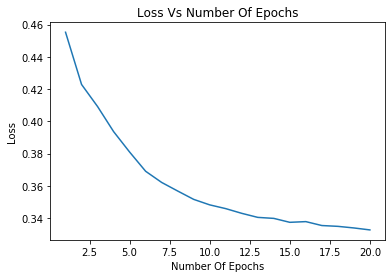

In [83]:
#Plot between Loss and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['loss']))
plt.title('Loss Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.show()

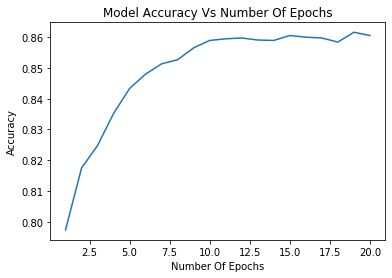

In [84]:
#Plot between Accuracy and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['accuracy']))
plt.title('Model Accuracy Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [104]:
#Accuracy Score and Confusion Matrix
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy: %.3f' % acc)

#Confusion Matrix
y_pred = np.round(model.predict(X_test))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['Actual:Not Churned', 'Actual:Churned'], columns=['Pred:Not Churned', 'Pred:Churned']))

Training Accuracy: 0.862
Testing Accuracy: 0.865
                    Pred:Not Churned  Pred:Churned
Actual:Not Churned              1898            82
Actual:Churned                   255           265


# Iteration 1 : Increasing the number of epochs to 30

In [89]:
#Building the architecture of the Neural Network
model1 = Sequential()
#Input Layer
model1.add(Dense(13, activation='sigmoid', input_shape=(13,)))
#First Hidden Layer
model1.add(Dense(13, activation='sigmoid'))
#Output Layer
model1.add(Dense(1, activation='sigmoid'))

#Compiling the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model1.fit(X_train, y_train,epochs=30, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/30
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.4516 - accuracy: 0.8044
Epoch 2/30
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4207 - accuracy: 0.8197
Epoch 3/30
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4134 - accuracy: 0.8265
Epoch 4/30
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4056 - accuracy: 0.8325
Epoch 5/30
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3947 - accuracy: 0.8369
Epoch 6/30
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3830 - accuracy: 0.8399
Epoch 7/30
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3743 - accuracy: 0.8472
Epoch 8/30
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3671 - accuracy: 0.8496
Epoch 9/30
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.3630 - accuracy: 0.8540
Epoch 10/30
7500/7500 [==========

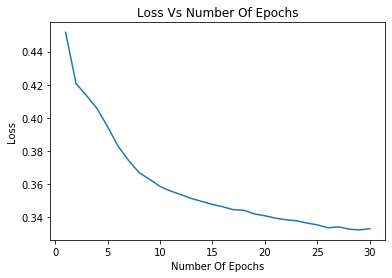

In [90]:
#Plot between Loss and Number Of Epochs
NumOfEpochs = np.arange(1,31)
plt.plot(NumOfEpochs, (history.history['loss']))
plt.title('Loss Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.show()

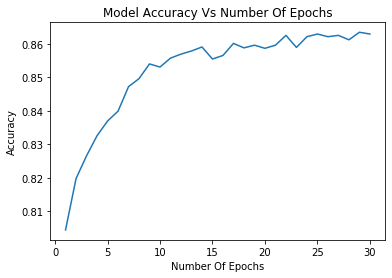

In [91]:
#Plot between Accuracy and Number Of Epochs
NumOfEpochs = np.arange(1,31)
plt.plot(NumOfEpochs, (history.history['accuracy']))
plt.title('Model Accuracy Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [105]:
#Accuracy Score and Confusion Matrix
loss, acc = model1.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy: %.3f' % acc)

#Confusion Matrix
y_pred = np.round(model1.predict(X_test))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['Actual:Not Churned', 'Actual:Churned'], columns=['Pred:Not Churned', 'Pred:Churned']))

Training Accuracy: 0.865
Testing Accuracy: 0.861
                    Pred:Not Churned  Pred:Churned
Actual:Not Churned              1922            58
Actual:Churned                   289           231


# Iteration 2: NN with 2 Hidden Layers and epochs=20

In [93]:
#Building the architecture of the Neural Network
model2 = Sequential()
#Input Layer
model2.add(Dense(13, activation='sigmoid', input_shape=(13,)))
#First Hidden Layer
model2.add(Dense(10, activation='sigmoid'))
#Second Hidden Layer
model2.add(Dense(10, activation='sigmoid'))
#Output Layer
model2.add(Dense(1, activation='sigmoid'))

#Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model2.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/20
7500/7500 [==============================] - 17s 2ms/sample - loss: 0.4671 - accuracy: 0.7943
Epoch 2/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4303 - accuracy: 0.8043
Epoch 3/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4236 - accuracy: 0.8195
Epoch 4/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4154 - accuracy: 0.8281
Epoch 5/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4069 - accuracy: 0.8317
Epoch 6/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3941 - accuracy: 0.8403
Epoch 7/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3812 - accuracy: 0.8423
Epoch 8/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3696 - accuracy: 0.8483
Epoch 9/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3626 - accuracy: 0.8523
Epoch 10/20
7500/7500 [==========

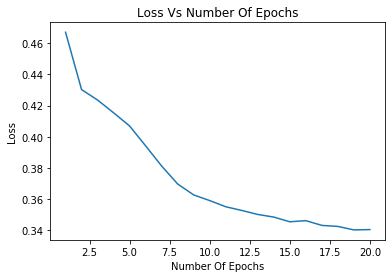

In [94]:
#Plot between Loss and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['loss']))
plt.title('Loss Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.show()

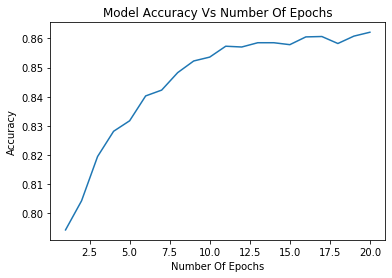

In [95]:
#Plot between Accuracy and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['accuracy']))
plt.title('Model Accuracy Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [106]:
#Accuracy Score and Confusion Matrix
loss, acc = model2.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy: %.3f' % acc)

#Confusion Matrix
y_pred = np.round(model2.predict(X_test))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['Actual:Not Churned', 'Actual:Churned'], columns=['Pred:Not Churned', 'Pred:Churned']))

Training Accuracy: 0.860
Testing Accuracy: 0.862
                    Pred:Not Churned  Pred:Churned
Actual:Not Churned              1869           111
Actual:Churned                   235           285


# Itertion 3: NN with 3 Hidden Layers and epochs=20

In [97]:
#Building the architecture of the Neural Network
model3 = Sequential()
#Input Layer
model3.add(Dense(13, activation='sigmoid', input_shape=(13,)))
#First Hidden Layer
model3.add(Dense(10, activation='sigmoid'))
#Second Hidden Layer
model3.add(Dense(10, activation='sigmoid'))
#Third Hidden Layer
model3.add(Dense(7, activation='sigmoid'))
#Output Layer
model3.add(Dense(1, activation='sigmoid'))

#Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model3.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/20
7500/7500 [==============================] - 18s 2ms/sample - loss: 0.4736 - accuracy: 0.7980
Epoch 2/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4308 - accuracy: 0.8008
Epoch 3/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4247 - accuracy: 0.8160
Epoch 4/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4185 - accuracy: 0.8252
Epoch 5/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4112 - accuracy: 0.8313
Epoch 6/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.4062 - accuracy: 0.8344
Epoch 7/20
7500/7500 [==============================] - 15s 2ms/sample - loss: 0.4010 - accuracy: 0.8373
Epoch 8/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3927 - accuracy: 0.8416
Epoch 9/20
7500/7500 [==============================] - 16s 2ms/sample - loss: 0.3744 - accuracy: 0.8503
Epoch 10/20
7500/7500 [==========

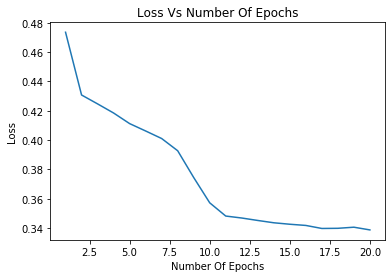

In [98]:
#Plot between Loss and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['loss']))
plt.title('Loss Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.show()

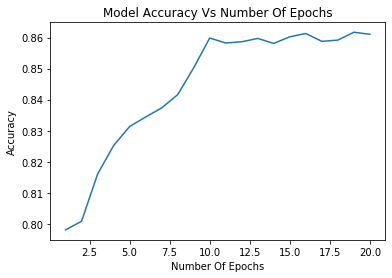

In [99]:
#Plot between Accuracy and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['accuracy']))
plt.title('Model Accuracy Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [107]:
#Accuracy Score and Confusion Matrix
loss, acc = model3.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)
loss, acc = model3.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy: %.3f' % acc)

#Confusion Matrix
y_pred = np.round(model3.predict(X_test))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['Actual:Not Churned', 'Actual:Churned'], columns=['Pred:Not Churned', 'Pred:Churned']))

Training Accuracy: 0.865
Testing Accuracy: 0.865
                    Pred:Not Churned  Pred:Churned
Actual:Not Churned              1914            66
Actual:Churned                   271           249


# Iteration 4: NN with 4 Hidden layers and epochs=20

In [52]:
#Building the architecture of the Neural Network
model4 = Sequential()
#Input Layer
model4.add(Dense(13, activation='sigmoid', input_shape=(13,)))
#First Hidden Layer
model4.add(Dense(10, activation='sigmoid'))
#Second Hidden Layer
model4.add(Dense(10, activation='sigmoid'))
#Third Hidden Layer
model4.add(Dense(7, activation='sigmoid'))
#Fourth Hidden Layer
model4.add(Dense(4, activation='sigmoid'))
#Output Layer
model4.add(Dense(1, activation='sigmoid'))

#Compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model4.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Train on 7500 samples
Epoch 1/20
7500/7500 [==============================] - 11s 1ms/sample - loss: 0.4785 - accuracy: 0.7977
Epoch 2/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.4352 - accuracy: 0.7977
Epoch 3/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.4307 - accuracy: 0.7972
Epoch 4/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.4247 - accuracy: 0.8084
Epoch 5/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.4098 - accuracy: 0.8303
Epoch 6/20
7500/7500 [==============================] - 11s 1ms/sample - loss: 0.3930 - accuracy: 0.8363
Epoch 7/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.3796 - accuracy: 0.8455
Epoch 8/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.3725 - accuracy: 0.8441
Epoch 9/20
7500/7500 [==============================] - 10s 1ms/sample - loss: 0.3663 - accuracy: 0.8515
Epoch 10/20
7500/7500 [==========

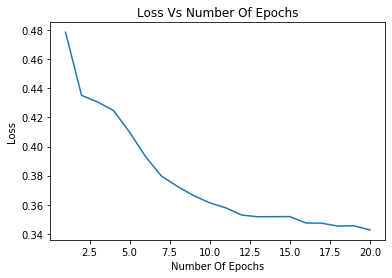

In [53]:
#Plot between Loss and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['loss']))
plt.title('Loss Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Loss')
plt.show()

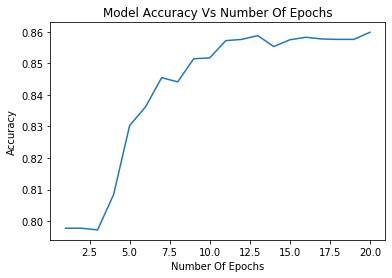

In [54]:
#Plot between Accuracy and Number Of Epochs
NumOfEpochs = np.arange(1,21)
plt.plot(NumOfEpochs, (history.history['accuracy']))
plt.title('Model Accuracy Vs Number Of Epochs')
plt.xlabel('Number Of Epochs')
plt.ylabel('Accuracy')
plt.show()

In [108]:
#Accuracy Score and Confusion Matrix
loss, acc = model4.evaluate(X_train, y_train, verbose=0)
print('Training Accuracy: %.3f' % acc)
loss, acc = model4.evaluate(X_test, y_test, verbose=0)
print('Testing Accuracy: %.3f' % acc)

#Confusion Matrix
y_pred = np.round(model4.predict(X_test))
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['Actual:Not Churned', 'Actual:Churned'], columns=['Pred:Not Churned', 'Pred:Churned']))

Training Accuracy: 0.856
Testing Accuracy: 0.848
                    Pred:Not Churned  Pred:Churned
Actual:Not Churned              1950            30
Actual:Churned                   350           170
